## Chapter 10: Working With Data

- Comes after
    1. finding what questions to answer
    2. Find data
    
#### One Dimensional Data

- One dimensional data is data that only consists of numbers. Examples include:
    - Amount of time a user spends each day on a website
    - Number of pages in books in a library

##### Step 1: Summary Statistics
- How many data points?
- largest, smallest data points, mean median, standard deviation, range
- This dosen't give us all the information though

##### Step 2: Group Data into buckets
- This step involves grouping data into discrete buckets and observing how many data points fall into each bucket
- Histograms are very useful for visualizations


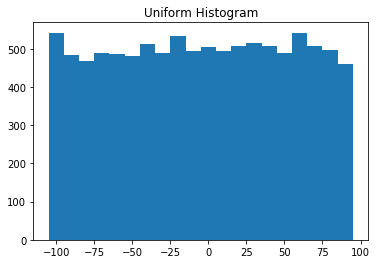

In [19]:
# creating buckets
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point:float,bucket_size:float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    # ex if bucket size is 10, and your point is 25 bucket is 20
    #                                   point is 98.3 bucket is 90
    return bucket_size * math.floor(point/bucket_size)

def make_histogram(points:List[float],bucket_size:float) -> Dict[float,int]:
    """buckets points and counts how many in bucket"""
    return Counter(bucketize(point,bucket_size) for point in points)
def plot_histogram(points:List[float],bucket_size:float,title:str= ""):
    histogram = make_histogram(points,bucket_size)
    plt.bar(histogram.keys(),histogram.values(),width = bucket_size)
    plt.title(title)

# example with data

import random
from scipy import stats

random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
# both have normal distribution with mean 0, standard deviation 57
# dont really know stats
#normal = [57 * inv_normal_cdf(mu = 0) for _ in range(10000)]

# both have mean 0 and sd close to 58, but very differnet distributions
plot_histogram(uniform, 10, "Uniform Histogram")


- Normal Distirbution, with SD near 58 and mean near 0
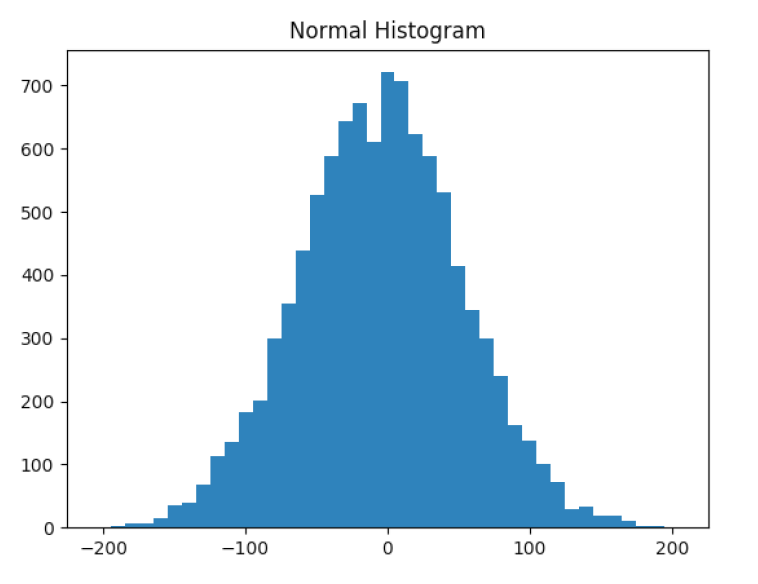

- POINT IS: DESPITE BOTH DATA HAVING SIMILAR MEAN AND SD, THEY CAN HAVE VERY DIFFERENT DISTRIBUTIONS, SO HISTOGRAMS ARE GOOD for analyzing data


#### 2D Data
- Consider we have dataset of users, it contains:
    - A person's age (x variable)
    - time spent on website
    - Account age
- We want to observe how age impacts time spent on a site, and the account age of a person
- We can try to understand each dimension individually but it is important to make a scatter plot and see both sets of data on same plot

- Pitfall: again both datasets can have same distributions but their covariance and data shown in a scatterplot can show radically different covariances

- Ex: if age vs time and age vs account_age may have same distribution. However, if you plot them together on a scatter plot the trends may be different. As well as that you can observe, the covariance between age and time versus age and account age may be different.

- IN Summary: apart from analyzing each x with each y for each dimesnion it is importnat to use a scatterplot and see correlations.

#### Multi-Dimensional data
- We want to observe how each dimension correlates with the other
- we can create a correlation matrix/graph which shows how each variable relates to every other variable. We can plot this or use sklearn to make a matrix of this.

#### NamedTuples

- data can be represented as dicts
```python
import datetime
stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}
```
- Cons of dict:
    - memory usage (small issue)
    - main issue: accessing dicts by key is error prone
```python
stock_price["symbal"] = "MSFT"
```
- ends up adding a new key by accident
- Complex dictionaries also hard to type annotate if it contains many data types 
- ex: if our data is like this prices: Dict[datetime.date, float] = {} it is easy, however it does not work too well for dicts with many data types

##### Named Tuple
```python
from collections import namedtuple
# first param is name, second is list
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
```
- benefit: tuples cant be overwritten, we can solve this by using classes
- as well as this, named tuples have typed annotations

```python
from typing import NamedTuple
class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
    
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()
```
#### Dataclasses (Less used)
- Mutable alternative to named tuples, does not inherit, uses a decorator

```python
import dataclasses from dataclass
@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float
        
    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

    price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)
assert price2.symbol == 'MSFT'
assert price2.closing_price == 106.03
assert price2.is_high_tech()
```
- mutable, so can change values
- if we tried chnaging value for named tuple we get error
```python
price2.closing_price /= 2
assert price2.closing_price == 51.03
```
- dataclass still susceptible to same issues as dict


#### Cleaning Data
- Check bad values, outliers, missing data
- Missing data:
    - Mean/Mediann substitution if have small samples
    - if have large data, can delete
    - * Look into this more

- reccomended to use function so that we can assert and write tests
- we can also add checks in our function: try-except/ regex if, and return None than crash program
- we can later process this out using another function

```python
from typing import Optional
import re

def try_parse_row(row: List[str]):
    symbol, date_, closing_price_ = row
   # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
       return None
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None
    
    return StockPrice(symbol, date, closing_price)
    
# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None
# But should return same as before if data is good
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock
# stock = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

# filter
import csv
data: List[StockPrice] = []
with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)
```

- For outliers: explore data techniques or do a ad-hoc analysis by going through data

#### Manipulating Data

- Situational:
    - things like given data what is the highest closing price of a stock?
    - largest one day change of a stock


#### Rescaling Data

- Some techniques susceptible to data scaling
- Case: have heights and weights of people and trying to find cluster of body sizes
- to cluster we need notion of distance -> we can pair height and weight in 2d space and find distances.

- Issue: we notice that distance between points when we have data in form [inch,pound] differs from [cm,pound].

```python
# inches,pounds
a_to_b = distance([63, 150], [67, 160]) # 10.77
a_to_c = distance([63, 150], [70, 171]) # 22.14
b_to_c = distance([67, 160], [70, 171]) # 11.40

# cm, pound
a_to_b = distance([160, 150], [170.2, 160]) # 14.28
a_to_c = distance([160, 150], [177.8, 171]) # 27.53
b_to_c = distance([170.2, 160], [177.8, 171]) # 13.37

# observe that initially b's closest neigbour is a
# rescaling causes b's closest neigbour to become c
```

- Technique: when dimensions have no relation, we rescale dimesnions so that each dimension has mean 0 and standard deviation 1 -> makes dimensions unitless
- Essentialy convert each dimension to a Z-score

```python
from typing import Tuple
from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
            for i in range(dim)]
    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)
    # Make a copy of each vector
    rescaled = [v[:] for v in data]
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]
 ```
 
 - in numpy/pandas we could do this:
 
```python

# new_df is our new df
# ddof is N-1 by default because ddof = 1

for col in list(df.cols):
    new_df[col] = (df[col]-df[col].mean())/df[col].std(ddof = 0)

```

#### Skip TQDM

#### Dimensionality Reduction PCA (R
##### When and Why to Use
- Sometimes useful data dimensions may not correspond with data we have.
- Also used to reduce dimensions in data and still retain information.
- This can in turn, be used for visualization.
- Good YT vid: https://www.youtube.com/watch?v=g-Hb26agBFg

- Use case: Data set with following columns/information
    1. Size
    2. Num.Rooms
    3. Num.Bathrooms
    4. Schools nearby
    5. crime Rate
    
    
- 1-3 is size based, we can use pca to make that into one feature, likewise we cna do the same for columns 4,5


##### Algoirthm

From: https://builtin.com/data-science/step-step-explanation-principal-component-analysis
1. Standardize each column by converting each varable in a column to its z score
2. Consider the following: we have three columns to our data: x,y,z (it's 3D data)
3. We make a coveriance matrix for all possible variable combinations. In this case, we would have

\begin{equation}
\begin{bmatrix}
Cov(x,x) & Cov(x,y) & Cov(x,z)\\
Cov(y,x) & Cov(y,y) & Cov(y,z)\\
Cov(z,x) & Cov(z,y) & Cov(z,z)
\end{bmatrix} 
\end{equation}

We also note that Cov(x,x) = Var(x) and Cov(x,y) = Cov(y,x). Thus the two triangles separated by covariances are equal

Eigenvectors and Eigenvalues of covariance matrix to identify principal components
- Principal componnets are linear combinations of initial variables, new variables are not correlated and most of the information from initial data squeezed into first principal components.
- Ex if I have 10-D data, PCA makes 10 principal components, where the 1st has most encoded data, second has 2nd most encoded data...

- Issue: PCA and principal components are less interpretable because they are linear combos of several data types and as such they have weird units.

- Principal components are directions of data that express most variance/ capture the largest range of data values
- PCA visualized:

<img src="https://builtin.com/sites/default/files/inline-images/Principal%20Component%20Analysis%20second%20principal.gif" width = 400>

- We have 2D data, the line best fits when data is most spread out
- Subsequent principal components, need to be unrelated to the first so they are perpendicular to the first. For n-dimensional data, we have n principal components.

4.
##### Eigenvectors and Eigenvalues

- Always in pairs, every eigenvector has eignevalue
- Calculating Eigenvectors:

1. Solve the characteristic equation: $$ det(A − λI) = 0  $$

- Where I is an identity matrix
- so we have for  $$ A − λI $$ :


$$
    \begin{bmatrix}
    a & b & c\\
    d & e & f\\
    g & h & i
    \end{bmatrix}  
    -
   \begin{bmatrix}
     \lambda & 0 & 0 \\
     0 & \lambda & 0 \\
     0 & 0 & \lambda
    \end{bmatrix}
     =
    \begin{bmatrix}
     a - \lambda & b & c \\
     d & e - \lambda & f \\
     g & h & i - \lambda
    \end{bmatrix} 
 $$

- We then need $$ det(A - \lambda I)$$

##### Determinants
- Good link, manually calculating will be annoying (recursion involved)
https://www.mathsisfun.com/algebra/matrix-determinant.html

- Finally we solve the equation:
$$ det(A - \lambda I) = 0 $$
- And the result is that we get a polynomial equation
- We proceed to solve the equation and take the integer valued solutions of lambda
- Finally for each $$ \lambda_1 , \lambda_2 , \lambda_3 $$ we solve the equation:
$$ A - \lambda_n I = 0 $$ using gaussian elimination.
- After solving we should have 3 eigenvectors for a 3x3 matrix, where each $$ \lambda$$ is it's corresponding eigenvalue

- We now rank our eigenvalues. Eigen-values from in descending order would be PC1, PC2 ...
- To find percentage of variance carried by each principal component, it is the eigenvalue $$ \lambda_n $$ divided by the sum of every eigenvalue

- We can choose how many eigenvectors/values we need to cut out

5. Feature Vector

- feature vector has columns as eignevectors we decide to keep

6. Recast data across principal axis
- Use the following formula to get the new dataset
$$ Reduced Dataset = (Feature Vector)^T * (Standardised Original Dataset)^T $$
- Note that T denotes the transpose operation